In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

from collections import Counter
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv(r"C:\Users\Nare\Downloads\Spaceship_Titanic.csv")
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 3.4 MB


In [5]:
data.drop("Name", axis = 1, inplace=True)

In [6]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [7]:
data.drop("Cabin", axis = 1, inplace=True)
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [8]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [9]:
data["HomePlanet"] = data["HomePlanet"].fillna(4)
data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [10]:
data["ShoppingMall"] = data["ShoppingMall"].fillna(0).astype(str)
data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall      0
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [11]:
med_age = data.Age.median()
data["Age"] = data["Age"].fillna(med_age).astype("float16")
data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall      0
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [12]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [33]:
data = pd.get_dummies(data, columns = ['HomePlanet'], dtype = "int8")
data

,PassengerId,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,HomePlanet_4,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,1,1,0,0,0,1,0
1,0002_01,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,1,1,0,0,1,0,0
2,0003_01,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,1,0,0,0,1,0
3,0003_02,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,1,0,0,0,1,0
4,0004_01,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,1,0,0,0,1,0
8689,9278_01,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,1,0,1,0,0
8690,9279_01,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,1,1,0,0,1,0,0
8691,9280_01,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0,1,0,0,0,1,0


In [32]:
data["CryoSleep"] = data["CryoSleep"].fillna(False)
data = pd.get_dummies(data, columns = ["CryoSleep"], dtype = "int8")
data

,PassengerId,HomePlanet,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True
0,0001_01,Europa,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,1,1,0
1,0002_01,Earth,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,1,1,0
2,0003_01,Europa,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,1,0
3,0003_02,Europa,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,1,0
4,0004_01,Earth,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,1,0
8689,9278_01,Earth,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,1
8690,9279_01,Earth,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,1,1,0
8691,9280_01,Europa,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0,1,0


In [15]:
data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall      0
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [213]:
data["Destination"] = data["Destination"].fillna(4)
data.isna().sum()


PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall      0
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [30]:
data = pd.get_dummies(data, columns = ['Destination'], dtype = "int8")

In [31]:
data

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,1
1,0002_01,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,1
2,0003_01,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,0003_02,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,0004_01,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0
8689,9278_01,Earth,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0
8690,9279_01,Earth,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,1
8691,9280_01,Europa,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0


In [17]:
data['VIP'] = data['VIP'].fillna(False) 
data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination     182
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall      0
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [34]:
pd.get_dummies(data, columns = ['VIP'], dtype = "int8")
data

,PassengerId,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,HomePlanet_4,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,1,1,0,0,0,1,0
1,0002_01,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,1,1,0,0,1,0,0
2,0003_01,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,1,0,0,0,1,0
3,0003_02,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,1,0,0,0,1,0
4,0004_01,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,1,0,0,0,1,0
8689,9278_01,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,1,0,1,0,0
8690,9279_01,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,1,1,0,0,1,0,0
8691,9280_01,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0,1,0,0,0,1,0


<Axes: >

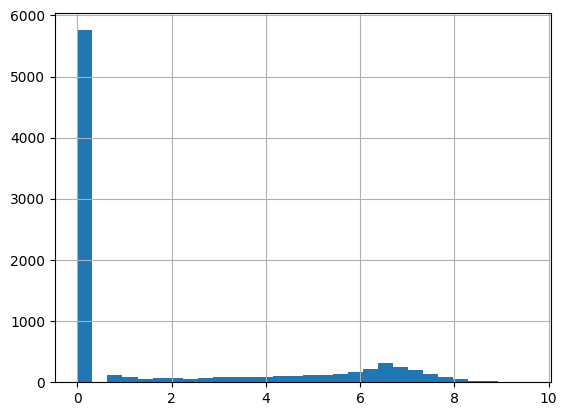

In [35]:
np.log(data["RoomService"] + 1).hist(bins = 30)

In [36]:
data["RoomService"].describe()

count     8693.0
mean         inf
std          inf
min          0.0
25%          0.0
50%          0.0
75%         41.0
max      14328.0
Name: RoomService, dtype: float64

In [37]:
med_RoomService = data.RoomService.median()
data["RoomService"] = data["RoomService"].fillna(med_RoomService).astype("float16")
data.isna().sum()

PassengerId                    0
Age                            0
VIP                            0
RoomService                    0
FoodCourt                    183
ShoppingMall                   0
Spa                          183
VRDeck                       188
Transported                    0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
CryoSleep_False                0
CryoSleep_True                 0
HomePlanet_4                   0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
dtype: int64

<Axes: >

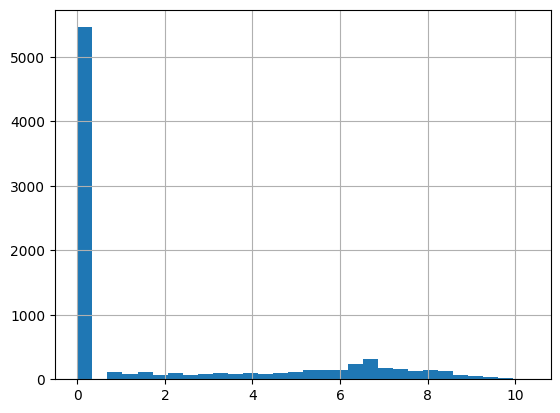

In [38]:
np.log(data["FoodCourt"] + 1).hist(bins = 30)

In [39]:
data["FoodCourt"].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [48]:
data


,PassengerId,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,...,PassengerId_07,PassengerId_08,PassengerId_01,PassengerId_02,PassengerId_03,PassengerId_04,PassengerId_05,PassengerId_06,PassengerId_07,PassengerId_08
0,0001_01,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,...,0,0,1,0,0,0,0,0,0,0
1,0002_01,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,...,0,0,1,0,0,0,0,0,0,0
2,0003_01,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,0,1,0,0,0,0,0,0,0
3,0003_02,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,0,0,1,0,0,0,0,0,0
4,0004_01,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,...,0,0,1,0,0,0,0,0,0,0
8689,9278_01,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,...,0,0,1,0,0,0,0,0,0,0
8690,9279_01,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,...,0,0,1,0,0,0,0,0,0,0
8691,9280_01,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,...,0,0,1,0,0,0,0,0,0,0


In [50]:
data["GroupCode"] = data["PassengerId"].str.split("_").str[1]
data = pd.get_dummies(data, columns=["GroupCode"], prefix="PassengerId", dtype="int8")
data.drop("PassengerId", axis = 1, inplace=True)
data

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,...,PassengerId_07,PassengerId_08,PassengerId_01,PassengerId_02,PassengerId_03,PassengerId_04,PassengerId_05,PassengerId_06,PassengerId_07,PassengerId_08
0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,...,0,0,1,0,0,0,0,0,0,0
1,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,...,0,0,1,0,0,0,0,0,0,0
2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,...,0,0,1,0,0,0,0,0,0,0
3,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,...,0,0,0,1,0,0,0,0,0,0
4,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,...,0,0,1,0,0,0,0,0,0,0
8689,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,...,0,0,1,0,0,0,0,0,0,0
8690,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,...,0,0,1,0,0,0,0,0,0,0
8691,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
data.isna().sum()

Age                            0
VIP                            0
RoomService                    0
FoodCourt                    183
ShoppingMall                   0
Spa                          183
VRDeck                       188
Transported                    0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
CryoSleep_False                0
CryoSleep_True                 0
HomePlanet_4                   0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
PassengerId_01                 0
PassengerId_02                 0
PassengerId_03                 0
PassengerId_04                 0
PassengerId_05                 0
PassengerId_06                 0
PassengerId_07                 0
PassengerId_08                 0
PassengerId_01                 0
PassengerId_02                 0
PassengerId_03                 0
PassengerId_04                 0
PassengerId_05                 0
PassengerI

In [53]:
data = pd.get_dummies(data, prefix="VIP", dtype="int8")
data

,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,VIP_974.0,VIP_976.0,VIP_977.0,VIP_98.0,VIP_980.0,VIP_981.0,VIP_984.0,VIP_99.0,VIP_991.0,VIP_994.0
0,39.0,False,0.0,0.0,0.0,0.0,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,24.0,False,109.0,9.0,549.0,44.0,True,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,58.0,True,43.0,3576.0,6715.0,49.0,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,33.0,False,0.0,1283.0,3329.0,193.0,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,16.0,False,303.0,70.0,565.0,2.0,True,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,True,0.0,6819.0,1643.0,74.0,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8689,18.0,False,0.0,0.0,0.0,0.0,False,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8690,26.0,False,0.0,0.0,1.0,0.0,True,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8691,32.0,False,0.0,1049.0,353.0,3235.0,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
med_FoodCourt = data.FoodCourt.median()
data["FoodCourt"] = data["FoodCourt"].fillna(med_FoodCourt).astype("float16")

In [55]:
data

,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,VIP_974.0,VIP_976.0,VIP_977.0,VIP_98.0,VIP_980.0,VIP_981.0,VIP_984.0,VIP_99.0,VIP_991.0,VIP_994.0
0,39.0,False,0.0,0.0,0.0,0.0,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,24.0,False,109.0,9.0,549.0,44.0,True,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,58.0,True,43.0,3576.0,6715.0,49.0,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,33.0,False,0.0,1283.0,3329.0,193.0,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,16.0,False,303.0,70.0,565.0,2.0,True,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,True,0.0,6820.0,1643.0,74.0,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8689,18.0,False,0.0,0.0,0.0,0.0,False,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8690,26.0,False,0.0,0.0,1.0,0.0,True,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8691,32.0,False,0.0,1049.0,353.0,3235.0,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data.isna().sum()

Age              0
VIP              0
RoomService      0
FoodCourt        0
Spa            183
              ... 
VIP_981.0        0
VIP_984.0        0
VIP_99.0         0
VIP_991.0        0
VIP_994.0        0
Length: 1163, dtype: int64

In [57]:
med_Spa = data.Spa.median()
data["Spa"] = data["Spa"].fillna(med_Spa).astype("float16")
data.isna().sum()

Age            0
VIP            0
RoomService    0
FoodCourt      0
Spa            0
              ..
VIP_981.0      0
VIP_984.0      0
VIP_99.0       0
VIP_991.0      0
VIP_994.0      0
Length: 1163, dtype: int64

In [59]:
med_VRDeck = data.VRDeck.median()
data["VRDeck"] = data["VRDeck"].fillna(med_VRDeck).astype("float16")
data.isna().sum()


Age            0
VIP            0
RoomService    0
FoodCourt      0
Spa            0
              ..
VIP_981.0      0
VIP_984.0      0
VIP_99.0       0
VIP_991.0      0
VIP_994.0      0
Length: 1163, dtype: int64

In [60]:
data

,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,VIP_974.0,VIP_976.0,VIP_977.0,VIP_98.0,VIP_980.0,VIP_981.0,VIP_984.0,VIP_99.0,VIP_991.0,VIP_994.0
0,39.0,False,0.0,0.0,0.0,0.0,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,24.0,False,109.0,9.0,549.0,44.0,True,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,58.0,True,43.0,3576.0,6716.0,49.0,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,33.0,False,0.0,1283.0,3328.0,193.0,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,16.0,False,303.0,70.0,565.0,2.0,True,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,True,0.0,6820.0,1643.0,74.0,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8689,18.0,False,0.0,0.0,0.0,0.0,False,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8690,26.0,False,0.0,0.0,1.0,0.0,True,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8691,32.0,False,0.0,1049.0,353.0,3236.0,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
data.drop("VIP", axis = 1, inplace=True)

In [62]:
data

,Age,RoomService,FoodCourt,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,...,VIP_974.0,VIP_976.0,VIP_977.0,VIP_98.0,VIP_980.0,VIP_981.0,VIP_984.0,VIP_99.0,VIP_991.0,VIP_994.0
0,39.0,0.0,0.0,0.0,0.0,False,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,549.0,44.0,True,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,58.0,43.0,3576.0,6716.0,49.0,False,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,33.0,0.0,1283.0,3328.0,193.0,False,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,16.0,303.0,70.0,565.0,2.0,True,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6820.0,1643.0,74.0,False,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8689,18.0,0.0,0.0,0.0,0.0,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8690,26.0,0.0,0.0,1.0,0.0,True,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8691,32.0,0.0,1049.0,353.0,3236.0,False,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X = data.drop(columns=['Transported'])
y = data['Transported']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
clf = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=10)
clf.fit(X_train, y_train)
print('Test accuracy:', accuracy_score(y_test, clf.predict(X_test)))
print('Train accuracy:', accuracy_score(y_train, clf.predict(X_train)))

Test accuracy: 0.7837837837837838
Train accuracy: 0.7824273799252229
